# verification if our methods works, using simple example from https://github.com/krashkov/Belief-Propagation/blob/master/4-ImplementationBP.ipynb

In [1]:
from bp import FactorGraph, BP, Loopy_BP
import numpy as np
import matplotlib.pyplot as plt 

array([0.37398374, 0.62601626])

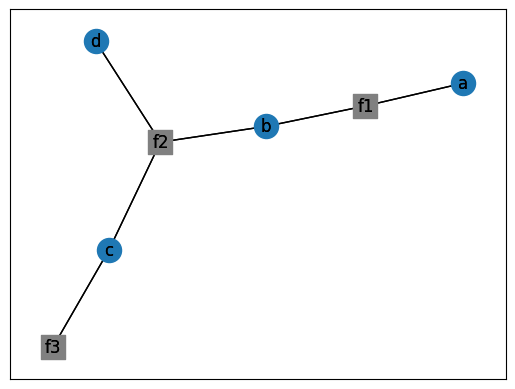

In [2]:
graph1 = FactorGraph()

graph1.add_variable_node('a', 2)
graph1.add_variable_node('b', 2)
graph1.add_variable_node('c', 3)
graph1.add_variable_node('d', 2)

graph1.add_factor_node('f1', ['a', 'b'], [[2, 3], [6, 4]])
graph1.add_factor_node('f2', ['b', 'd', 'c'], [[[7,2,3], [1,5,2]], [[8,3,9], [6,4,2]]])
graph1.add_factor_node('f3', ['c'], [5,1,9])

graph1.draw()

model1 = BP(graph1)
model1.belief('b')

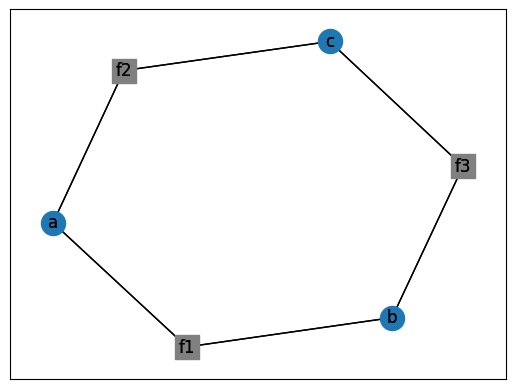

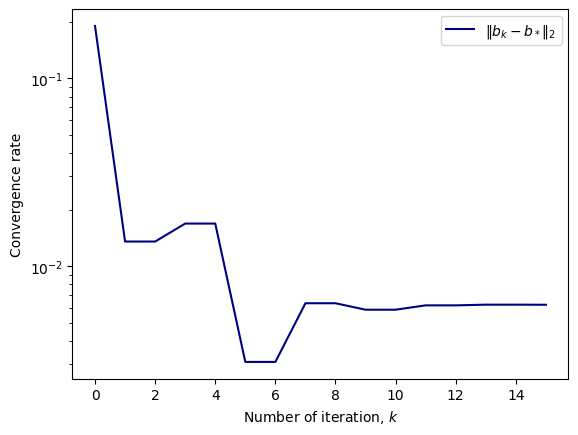

In [3]:
graph2 = FactorGraph()

graph2.add_variable_node('a', 2)
graph2.add_variable_node('b', 2)
graph2.add_variable_node('c', 3)

graph2.add_factor_node('f1', ['a', 'b'], [[2, 3], [6, 4]])
graph2.add_factor_node('f2', ['a', 'c'], [[7,2,3], [1,5,2]])
graph2.add_factor_node('f3', ['b', 'c'], [[7,9,3], [6,4,2]])

graph2.draw(layout='spring')
plt.show()

model2 = Loopy_BP(graph2)
exact = np.array([0.63451777, 0.36548223])

belief_evol = [model2.belief('b')]
for i in range(15):
    model2.loop()
    belief_evol.append(model2.belief('b'))

plt.semilogy(np.linalg.norm(belief_evol - exact, axis=1), label=r"$\|b_k - b_*\|_2$", color='navy')
plt.xlabel(r"Number of iteration, $k$")
plt.ylabel(r"Convergence rate")
plt.legend()
plt.show()